In [ ]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')


In [ ]:

data = sns.load_dataset('flights')

print(data.head())


   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [ ]:
# Combine 'year' and 'month' columns to create a Date column
data['Date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))

# Set the Date as index
data.set_index('Date', inplace=True)

# Drop old columns for simplicity
data.drop(['year', 'month'], axis=1, inplace=True)

print("\n✅ Time-series formatted data:")
print(data.head())



✅ Time-series formatted data:
            passengers
Date                  
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


/tmp/ipython-input-1167274636.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))


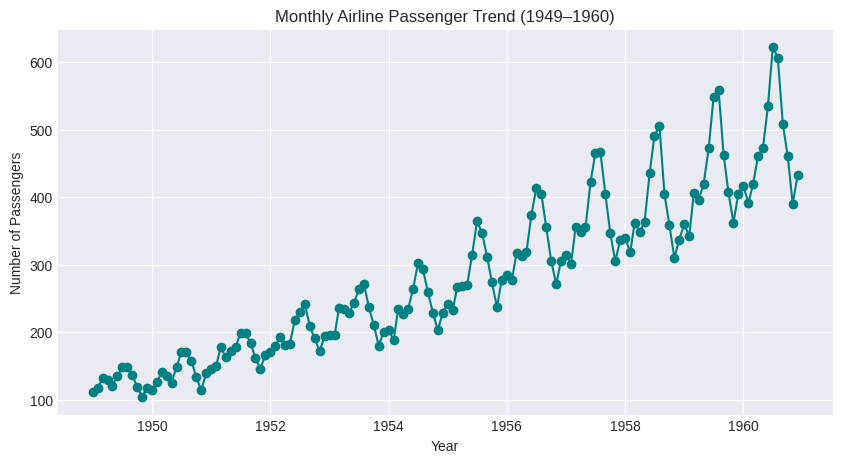

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.index, data['passengers'], color='teal', marker='o')
plt.title("Monthly Airline Passenger Trend (1949–1960)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()


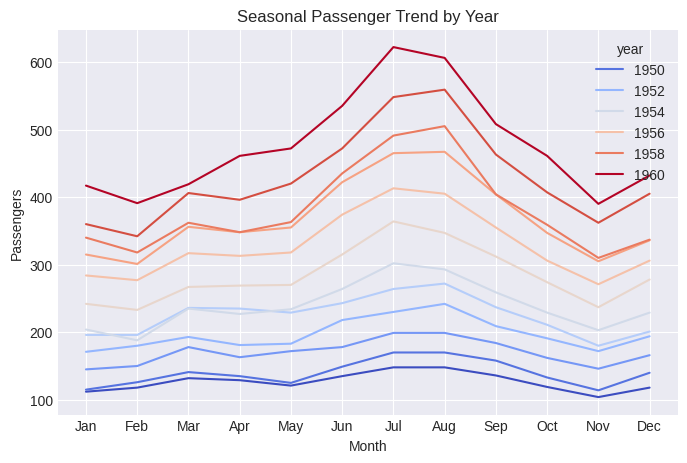

In [ ]:
# Reload for month/year grouping
flights = sns.load_dataset('flights')

plt.figure(figsize=(8,5))
sns.lineplot(data=flights, x='month', y='passengers', hue='year', palette='coolwarm')
plt.title("Seasonal Passenger Trend by Year")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.show()


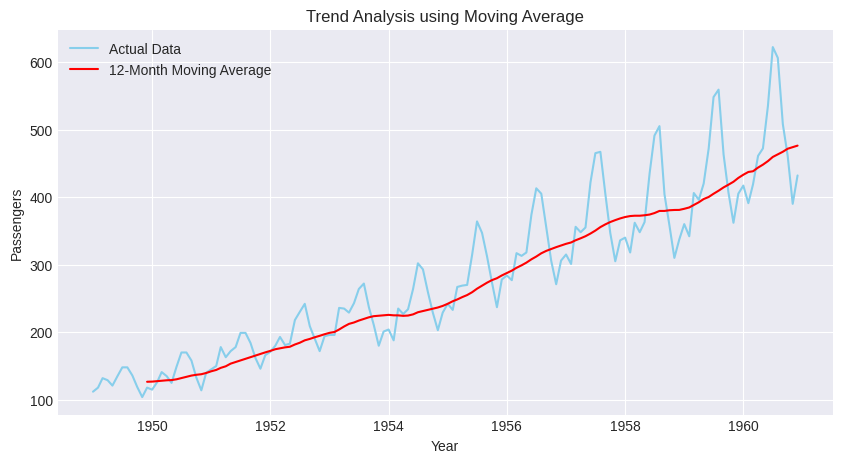

In [ ]:
# 12-month moving average
data['12-Month MA'] = data['passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,5))
plt.plot(data.index, data['passengers'], label='Actual Data', color='skyblue')
plt.plot(data.index, data['12-Month MA'], label='12-Month Moving Average', color='red')
plt.title("Trend Analysis using Moving Average")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [ ]:
print("📈 Highest passenger count:", data['passengers'].max())
print("📉 Lowest passenger count:", data['passengers'].min())
print("🔹 Average passengers:", round(data['passengers'].mean(), 2))


📈 Highest passenger count: 622
📉 Lowest passenger count: 104
🔹 Average passengers: 280.3
